# CUSTOMER CHURN CLASSIFICATION PROJECT


## BUSINESS UNDERSTANDING

### Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.¶

### For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.


# PROJECT EXPECTATION

### In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Our analysis or methods comprises the following steps:¶

### 1) Hypothesis formation and Data Processing - Importing the relevant libraries and modules, Cleaning of Data, Check data types, Encoding Data labels etc.

### 2)Data Evaluation -- Perform bivariate and multivariate analysis, EDA

### 3)Build & Select Model -- Train Model on dataset and select the best performing model.

### 4)Evaluate your chosen Model.

### 5)Model Improvement.

### 6)Future Predictions.

### 7)Key Insights and Conclusion.


# HYPOTHESIS STATEMENT

### H0: CHURN RATE IS NOT DEPENDENT ON THE GENDER¶

### H1: CHURN RATE IS DEPENDENT ON THE GENDER


# ANALYTICAL QUESTIONS

### 1) What is the total annual charges

### 2) What is the total charges of males and females respectively.¶

### 3) Which services has the highest churn rate

### 4) Which Services has the highest charge

### 5) Which Gender churn the most.

## IMPORTING LIBRARIES

In [298]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
import pickle

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm # sklearn modules for data preprocessing:from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #sklearn modules for Model Selection:from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score #Standard 
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading all the Datasets

# Train Datasets
data1 = pd.read_csv(r'SQL_DATASET.csv')

data2 = pd.read_csv(r'LP2_Telco-churn-last-2000.csv')

# Test Dataset
data3 = pd.read_excel(r'Telco-churn-second-2000.xlsx')

In [3]:
data1

Unnamed: 0          customerID  gender  SeniorCitizen  Partner  \
0              0          7590-VHVEG  Female          False     True   
1              1          5575-GNVDE    Male          False    False   
2              2          3668-QPYBK    Male          False    False   
3              3          7795-CFOCW    Male          False    False   
4              4          9237-HQITU  Female          False    False   
...          ...                 ...     ...            ...      ...   
2995        2995          2209-XADXF  Female          False    False   
2996        2996          6620-JDYNW  Female          False    False   
2997        2997          1891-FZYSA    Male           True     True   
2998        2998          4770-UEZOX    Male          False    False   
2999        2999  1A1:U3001038-RQOST    Male          False     True   

      Dependents  tenure  PhoneService MultipleLines InternetService  ...  \
0          False       1         False           NaN             DSL  ...   
1          False      34          True         False             DSL  ...   
2          False       2          True         False             DSL  ...   
3          False      45         False           NaN             DSL  ...   
4          False       2          True         False     Fiber optic  ...   
...          ...     ...           ...           ...             ...  ...   
2995       False       1         False           NaN             DSL  ...   
2996       False      18          True          True             DSL  ...   
2997       False      69          True          True     Fiber optic  ...   
2998       False       2          True         False     Fiber optic  ...   
2999        True      19          True         False              No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               False       False       False           False  Month-to-month   
1                True       False       False           False        One year   
2               False       False       False           False  Month-to-month   
3                True        True       False           False        One year   
4               False       False       False           False  Month-to-month   
...               ...         ...         ...             ...             ...   
2995            False       False       False           False  Month-to-month   
2996             True       False       False           False  Month-to-month   
2997            False       False        True           False  Month-to-month   
2998            False       False       False           False  Month-to-month   
2999              NaN         NaN         NaN             NaN  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                True           Electronic check       29.850000    29.850000   
1               False               Mailed check       56.950001  1889.500000   
2                True               Mailed check       53.849998   108.150002   
3               False  Bank transfer (automatic)       42.299999  1840.750000   
4                True           Electronic check       70.699997   151.649994   
...               ...                        ...             ...          ...   
2995            False  Bank transfer (automatic)       25.250000    25.250000   
2996             True               Mailed check       60.599998  1156.349976   
2997             True           Electronic check       89.949997  6143.149902   
2998             True           Electronic check       74.750000   144.800003   
2999            False               Mailed check       20.600000   414.950012   

      Churn  
0     False  
1     False  
2      True  
3     False  
4      True  
...     ...  
2995  False  
2996  False  
2997   True  
2998  False  
2999  False  

[3000 rows x 22 columns]

In [4]:
# delecting the Unamed column

del data1['Unnamed: 0']

In [5]:
data1

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             7590-VHVEG  Female          False     True       False       1   
1             5575-GNVDE    Male          False    False       False      34   
2             3668-QPYBK    Male          False    False       False       2   
3             7795-CFOCW    Male          False    False       False      45   
4             9237-HQITU  Female          False    False       False       2   
...                  ...     ...            ...      ...         ...     ...   
2995          2209-XADXF  Female          False    False       False       1   
2996          6620-JDYNW  Female          False    False       False      18   
2997          1891-FZYSA    Male           True     True       False      69   
2998          4770-UEZOX    Male          False    False       False       2   
2999  1A1:U3001038-RQOST    Male          False     True        True      19   

      PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0            False           NaN             DSL          False  ...   
1             True         False             DSL           True  ...   
2             True         False             DSL           True  ...   
3            False           NaN             DSL           True  ...   
4             True         False     Fiber optic          False  ...   
...            ...           ...             ...            ...  ...   
2995         False           NaN             DSL          False  ...   
2996          True          True             DSL           True  ...   
2997          True          True     Fiber optic          False  ...   
2998          True         False     Fiber optic          False  ...   
2999          True         False              No            NaN  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               False       False       False           False  Month-to-month   
1                True       False       False           False        One year   
2               False       False       False           False  Month-to-month   
3                True        True       False           False        One year   
4               False       False       False           False  Month-to-month   
...               ...         ...         ...             ...             ...   
2995            False       False       False           False  Month-to-month   
2996             True       False       False           False  Month-to-month   
2997            False       False        True           False  Month-to-month   
2998            False       False       False           False  Month-to-month   
2999              NaN         NaN         NaN             NaN  Month-to-month   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                True           Electronic check      29.850000     29.850000   
1               False               Mailed check      56.950001   1889.500000   
2                True               Mailed check      53.849998    108.150002   
3               False  Bank transfer (automatic)      42.299999   1840.750000   
4                True           Electronic check      70.699997    151.649994   
...               ...                        ...            ...           ...   
2995            False  Bank transfer (automatic)      25.250000     25.250000   
2996             True               Mailed check      60.599998   1156.349976   
2997             True           Electronic check      89.949997   6143.149902   
2998             True           Electronic check      74.750000    144.800003   
2999            False               Mailed check      20.600000    414.950012   

      Churn  
0     False  
1     False  
2      True  
3     False  
4      True  
...     ...  
2995  False  
2996  False  
2997   True  
2998  False  
2999  False  

[3000 rows x 21 columns]

In [6]:
data2

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     5600-PDUJF    Male              0      No         No       6   
1     8292-TYSPY    Male              0      No         No      19   
2     0567-XRHCU  Female              0     Yes        Yes      69   
3     1867-BDVFH    Male              0     Yes        Yes      11   
4     2067-QYTCF  Female              0     Yes         No      64   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL             No  ...   
1             Yes                No             DSL             No  ...   
2              No  No phone service             DSL            Yes  ...   
3             Yes               Yes     Fiber optic             No  ...   
4             Yes               Yes     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
2038          Yes               Yes             DSL            Yes  ...   
2039          Yes               Yes     Fiber optic             No  ...   
2040           No  No phone service             DSL            Yes  ...   
2041          Yes               Yes     Fiber optic             No  ...   
2042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes          No              No  Month-to-month   
1                 Yes         Yes          No              No  Month-to-month   
2                 Yes          No          No             Yes        Two year   
3                  No          No          No              No  Month-to-month   
4                 Yes         Yes         Yes             Yes  Month-to-month   
...               ...         ...         ...             ...             ...   
2038              Yes         Yes         Yes             Yes        One year   
2039              Yes          No         Yes             Yes        One year   
2040               No          No          No              No  Month-to-month   
2041               No          No          No              No  Month-to-month   
2042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes    Credit card (automatic)          49.50         312.7   
1                 Yes    Credit card (automatic)          55.00        1046.5   
2                 Yes    Credit card (automatic)          43.95        2960.1   
3                 Yes           Electronic check          74.35         834.2   
4                 Yes           Electronic check         111.15        6953.4   
...               ...                        ...            ...           ...   
2038              Yes               Mailed check          84.80        1990.5   
2039              Yes    Credit card (automatic)         103.20        7362.9   
2040              Yes           Electronic check          29.60        346.45   
2041              Yes               Mailed check          74.40         306.6   
2042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1      Yes  
2       No  
3      Yes  
4       No  
...    ...  
2038    No  
2039    No  
2040    No  
2041   Yes  
2042    No  

[2043 rows x 21 columns]

In [7]:
data3

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7613-LLQFO    Male              0      No         No      12   
1     4568-TTZRT    Male              0      No         No       9   
2     9513-DXHDA    Male              0      No         No      27   
3     2640-PMGFL    Male              0      No        Yes      27   
4     3801-HMYNL    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
1995  7912-SYRQT  Female              0      No         No       7   
1996  3557-HTYWR  Female              0      No         No      47   
1997  4816-JBHOV    Male              1      No         No       2   
1998  8920-NAVAY    Male              1      No         No      62   
1999  1699-TLDLZ  Female              0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes           Yes     Fiber optic                   No  ...   
1             Yes            No              No  No internet service  ...   
2             Yes            No             DSL                  Yes  ...   
3             Yes           Yes     Fiber optic                   No  ...   
4             Yes            No     Fiber optic                   No  ...   
...           ...           ...             ...                  ...  ...   
1995          Yes           Yes     Fiber optic                   No  ...   
1996          Yes           Yes             DSL                  Yes  ...   
1997          Yes            No             DSL                   No  ...   
1998          Yes           Yes     Fiber optic                   No  ...   
1999          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
0                      No                   No                  Yes   
1     No internet service  No internet service  No internet service   
2                     Yes                  Yes                  Yes   
3                      No                  Yes                   No   
4                      No                   No                  Yes   
...                   ...                  ...                  ...   
1995                   No                   No                   No   
1996                   No                  Yes                   No   
1997                   No                   No                   No   
1998                  Yes                  Yes                  Yes   
1999  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
0                      No  Month-to-month              Yes   
1     No internet service  Month-to-month               No   
2                     Yes        One year               No   
3                      No  Month-to-month              Yes   
4                     Yes  Month-to-month               No   
...                   ...             ...              ...   
1995                   No  Month-to-month              Yes   
1996                  Yes        Two year               No   
1997                   No  Month-to-month              Yes   
1998                  Yes        One year              Yes   
1999  No internet service        Two year               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
0              Electronic check          84.45       1059.55   Yes  
1                  Mailed check          20.40         181.8    No  
2              Electronic check          81.70       2212.55    No  
3              Electronic check          79.50       2180.55   Yes  
4                  Mailed check          89.15         89.15   Yes  
...                         ...            ...           ...   ...  
1995  Bank transfer (automatic)          75.10        552.95   Yes  
1996               Mailed check          74.05        3496.3    No  
1997           Electr

# MERGING THE TRAIN DATASETS BY CONCATINATING DATA1 AND DATA2

In [8]:
# concatenating data1, data2 to get the train data

train_df = pd.concat([data1, data2], ignore_index=True)

In [9]:
train_df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female         False    True      False       1   
1     5575-GNVDE    Male         False   False      False      34   
2     3668-QPYBK    Male         False   False      False       2   
3     7795-CFOCW    Male         False   False      False      45   
4     9237-HQITU  Female         False   False      False       2   
...          ...     ...           ...     ...        ...     ...   
5038  6840-RESVB    Male             0     Yes        Yes      24   
5039  2234-XADUH  Female             0     Yes        Yes      72   
5040  4801-JZAZL  Female             0     Yes        Yes      11   
5041  8361-LTMKD    Male             1     Yes         No       4   
5042  3186-AJIEK    Male             0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           False               NaN             DSL          False  ...   
1            True             False             DSL           True  ...   
2            True             False             DSL           True  ...   
3           False               NaN             DSL           True  ...   
4            True             False     Fiber optic          False  ...   
...           ...               ...             ...            ...  ...   
5038          Yes               Yes             DSL            Yes  ...   
5039          Yes               Yes     Fiber optic             No  ...   
5040           No  No phone service             DSL            Yes  ...   
5041          Yes               Yes     Fiber optic             No  ...   
5042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               False       False       False           False  Month-to-month   
1                True       False       False           False        One year   
2               False       False       False           False  Month-to-month   
3                True        True       False           False        One year   
4               False       False       False           False  Month-to-month   
...               ...         ...         ...             ...             ...   
5038              Yes         Yes         Yes             Yes        One year   
5039              Yes          No         Yes             Yes        One year   
5040               No          No          No              No  Month-to-month   
5041               No          No          No              No  Month-to-month   
5042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                True           Electronic check      29.850000         29.85   
1               False               Mailed check      56.950001        1889.5   
2                True               Mailed check      53.849998    108.150002   
3               False  Bank transfer (automatic)      42.299999       1840.75   
4                True           Electronic check      70.699997    151.649994   
...               ...                        ...            ...           ...   
5038              Yes               Mailed check      84.800000        1990.5   
5039              Yes    Credit card (automatic)     103.200000        7362.9   
5040              Yes           Electronic check      29.600000        346.45   
5041              Yes               Mailed check      74.400000         306.6   
5042              Yes  Bank transfer (automatic)     105.650000        6844.5   

      Churn  
0     False  
1     False  
2      True  
3     False  
4      True  
...     ...  
5038     No  
5039     No  
5040     No  
5041    Yes  
5042     No  

[5043 rows x 21 columns]

In [10]:
# Test data

test_df = data3

test_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7613-LLQFO    Male              0      No         No      12   
1     4568-TTZRT    Male              0      No         No       9   
2     9513-DXHDA    Male              0      No         No      27   
3     2640-PMGFL    Male              0      No        Yes      27   
4     3801-HMYNL    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
1995  7912-SYRQT  Female              0      No         No       7   
1996  3557-HTYWR  Female              0      No         No      47   
1997  4816-JBHOV    Male              1      No         No       2   
1998  8920-NAVAY    Male              1      No         No      62   
1999  1699-TLDLZ  Female              0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes           Yes     Fiber optic                   No  ...   
1             Yes            No              No  No internet service  ...   
2             Yes            No             DSL                  Yes  ...   
3             Yes           Yes     Fiber optic                   No  ...   
4             Yes            No     Fiber optic                   No  ...   
...           ...           ...             ...                  ...  ...   
1995          Yes           Yes     Fiber optic                   No  ...   
1996          Yes           Yes             DSL                  Yes  ...   
1997          Yes            No             DSL                   No  ...   
1998          Yes           Yes     Fiber optic                   No  ...   
1999          Yes            No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
0                      No                   No                  Yes   
1     No internet service  No internet service  No internet service   
2                     Yes                  Yes                  Yes   
3                      No                  Yes                   No   
4                      No                   No                  Yes   
...                   ...                  ...                  ...   
1995                   No                   No                   No   
1996                   No                  Yes                   No   
1997                   No                   No                   No   
1998                  Yes                  Yes                  Yes   
1999  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
0                      No  Month-to-month              Yes   
1     No internet service  Month-to-month               No   
2                     Yes        One year               No   
3                      No  Month-to-month              Yes   
4                     Yes  Month-to-month               No   
...                   ...             ...              ...   
1995                   No  Month-to-month              Yes   
1996                  Yes        Two year               No   
1997                   No  Month-to-month              Yes   
1998                  Yes        One year              Yes   
1999  No internet service        Two year               No   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
0              Electronic check          84.45       1059.55   Yes  
1                  Mailed check          20.40         181.8    No  
2              Electronic check          81.70       2212.55    No  
3              Electronic check          79.50       2180.55   Yes  
4                  Mailed check          89.15         89.15   Yes  
...                         ...            ...           ...   ...  
1995  Bank transfer (automatic)          75.10        552.95   Yes  
1996               Mailed check          74.05        3496.3    No  
1997           Electr

# EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
train_df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female         False    True      False       1        False   
1  5575-GNVDE    Male         False   False      False      34         True   
2  3668-QPYBK    Male         False   False      False       2         True   
3  7795-CFOCW    Male         False   False      False      45        False   
4  9237-HQITU  Female         False   False      False       2         True   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0           NaN             DSL          False  ...            False   
1         False             DSL           True  ...             True   
2         False             DSL           True  ...            False   
3           NaN             DSL           True  ...             True   
4         False     Fiber optic          False  ...            False   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       False       False           False  Month-to-month             True   
1       False       False           False        One year            False   
2       False       False           False  Month-to-month             True   
3        True       False           False        One year            False   
4       False       False           False  Month-to-month             True   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check      29.850000         29.85  False  
1               Mailed check      56.950001        1889.5  False  
2               Mailed check      53.849998    108.150002   True  
3  Bank transfer (automatic)      42.299999       1840.75  False  
4           Electronic check      70.699997    151.649994   True  

[5 rows x 21 columns]

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
train_df.shape

(5043, 21)

In [14]:
train_df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
train_df.describe()

tenure  MonthlyCharges
count  5043.000000     5043.000000
mean     32.576641       65.090214
std      24.529807       30.068133
min       0.000000       18.400000
25%       9.000000       35.775000
50%      29.000000       70.550003
75%      56.000000       90.050003
max      72.000000      118.650002

In [16]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [18]:
test_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
test_df.shape

(2000, 21)

In [20]:
test_df.head()

customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male              0      No         No      12          Yes   
1  4568-TTZRT   Male              0      No         No       9          Yes   
2  9513-DXHDA   Male              0      No         No      27          Yes   
3  2640-PMGFL   Male              0      No        Yes      27          Yes   
4  3801-HMYNL   Male              0     Yes        Yes       1          Yes   

  MultipleLines InternetService       OnlineSecurity  ...  \
0           Yes     Fiber optic                   No  ...   
1            No              No  No internet service  ...   
2            No             DSL                  Yes  ...   
3           Yes     Fiber optic                   No  ...   
4            No     Fiber optic                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                   No                   No                  Yes   
1  No internet service  No internet service  No internet service   
2                  Yes                  Yes                  Yes   
3                   No                  Yes                   No   
4                   No                   No                  Yes   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                   No  Month-to-month              Yes  Electronic check   
1  No internet service  Month-to-month               No      Mailed check   
2                  Yes        One year               No  Electronic check   
3                   No  Month-to-month              Yes  Electronic check   
4                  Yes  Month-to-month               No      Mailed check   

  MonthlyCharges  TotalCharges Churn  
0          84.45       1059.55   Yes  
1          20.40         181.8    No  
2          81.70       2212.55    No  
3          79.50       2180.55   Yes  
4          89.15         89.15   Yes  

[5 rows x 21 columns]

In [21]:
test_df.shape

(2000, 21)

In [22]:
# Drpping the Churn Columnin the test dataset

test_df = test_df.drop('Churn', axis=1)

In [23]:
test_df.shape

(2000, 20)

In [24]:
test_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [25]:
# IN OUR TRAIN DATASET, LET CONVERT ALL THE TRUE TO YES AND FALSE TO NO.

train_df = train_df.replace({True:'Yes',False:'No','No Internet Service':'No','Yes':'Yes','No':'No','No phone service':'No'}, inplace = False)

# Converting 'TotalCharges' Column to Numeric

train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors = 'coerce')

train_df


customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
5038  6840-RESVB    Male            No     Yes        Yes      24   
5039  2234-XADUH  Female            No     Yes        Yes      72   
5040  4801-JZAZL  Female            No     Yes        Yes      11   
5041  8361-LTMKD    Male           Yes     Yes         No       4   
5042  3186-AJIEK    Male            No      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No           NaN             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No           NaN             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
5038          Yes           Yes             DSL            Yes  ...   
5039          Yes           Yes     Fiber optic             No  ...   
5040           No            No             DSL            Yes  ...   
5041          Yes           Yes     Fiber optic             No  ...   
5042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
5038              Yes         Yes         Yes             Yes        One year   
5039              Yes          No         Yes             Yes        One year   
5040               No          No          No              No  Month-to-month   
5041               No          No          No              No  Month-to-month   
5042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check      29.850000     29.850000   
1                  No               Mailed check      56.950001   1889.500000   
2                 Yes               Mailed check      53.849998    108.150002   
3                  No  Bank transfer (automatic)      42.299999   1840.750000   
4                 Yes           Electronic check      70.699997    151.649994   
...               ...                        ...            ...           ...   
5038              Yes               Mailed check      84.800000   1990.500000   
5039              Yes    Credit card (automatic)     103.200000   7362.900000   
5040              Yes           Electronic check      29.600000    346.450000   
5041              Yes               Mailed check      74.400000    306.600000   
5042              Yes  Bank transfer (automatic)     105.650000   6844.500000   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
5038     No  
5039     No  
5040     No  
5041    Yes  
5042     No  

[5043 rows x 21 columns]

In [26]:
# lets split our dataset into numeric and categorical datas

num_col = train_df.select_dtypes(exclude='object')

cat_col = train_df.select_dtypes(include='object')


In [27]:
train_df.corr()

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.240645      0.826264
MonthlyCharges  0.240645        1.000000      0.647007
TotalCharges    0.826264        0.647007      1.000000

<AxesSubplot:>

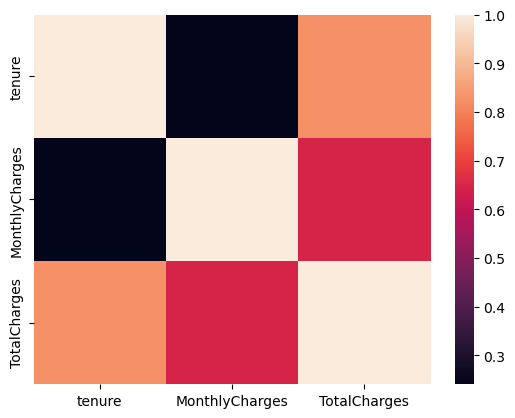

In [28]:
sns.heatmap(train_df.corr())

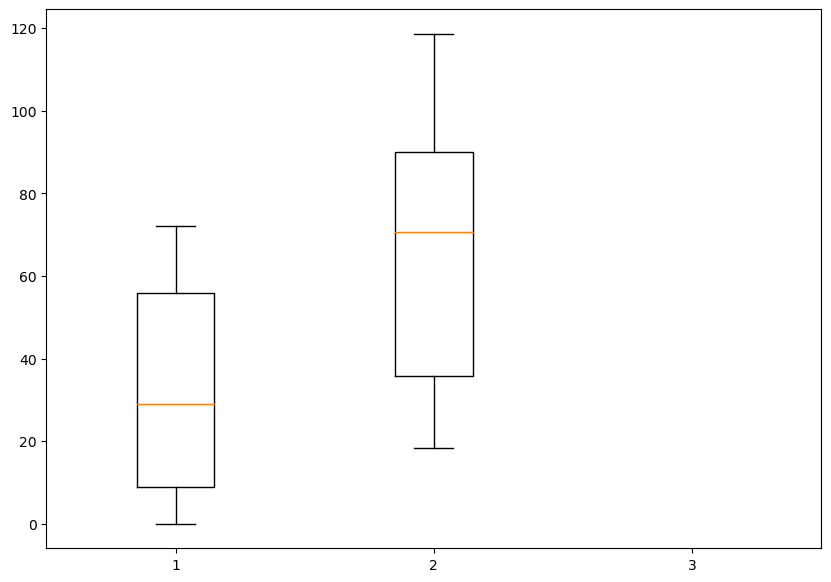

In [29]:
fig=plt.figure(figsize=(10,7))

plt.boxplot(num_col)

plt.show()



# UNIVARIATE ANALYSIS

### It is the simplest method of analyzing data where we examin each variable individually. 

### For Categorical features, we use frequency table or bar plots which will calculate the number of each category in a particular variable.

### For numerical features, probability density plots can be used to look at the distribution of the variable.




## Target Variable
#### We first look at the target variable which is the Churn Column. As it is a categorical variable. 

### let us look at its frequency table, percentage distribution and barplot.

In [30]:
train_df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
5038  6840-RESVB    Male            No     Yes        Yes      24   
5039  2234-XADUH  Female            No     Yes        Yes      72   
5040  4801-JZAZL  Female            No     Yes        Yes      11   
5041  8361-LTMKD    Male           Yes     Yes         No       4   
5042  3186-AJIEK    Male            No      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No           NaN             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No           NaN             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
5038          Yes           Yes             DSL            Yes  ...   
5039          Yes           Yes     Fiber optic             No  ...   
5040           No            No             DSL            Yes  ...   
5041          Yes           Yes     Fiber optic             No  ...   
5042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
5038              Yes         Yes         Yes             Yes        One year   
5039              Yes          No         Yes             Yes        One year   
5040               No          No          No              No  Month-to-month   
5041               No          No          No              No  Month-to-month   
5042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check      29.850000     29.850000   
1                  No               Mailed check      56.950001   1889.500000   
2                 Yes               Mailed check      53.849998    108.150002   
3                  No  Bank transfer (automatic)      42.299999   1840.750000   
4                 Yes           Electronic check      70.699997    151.649994   
...               ...                        ...            ...           ...   
5038              Yes               Mailed check      84.800000   1990.500000   
5039              Yes    Credit card (automatic)     103.200000   7362.900000   
5040              Yes           Electronic check      29.600000    346.450000   
5041              Yes               Mailed check      74.400000    306.600000   
5042              Yes  Bank transfer (automatic)     105.650000   6844.500000   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
5038     No  
5039     No  
5040     No  
5041    Yes  
5042     No  

[5043 rows x 21 columns]

In [31]:
# Frequency table of a variable will give us the count of category in that variable.

train_df['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

In [32]:
# Sum of counts

train_df['Churn'].value_counts().sum()

5042

In [33]:
#Normalize can be set to True to print proportions instead of number

train_df['Churn'].value_counts(normalize = True)

No     0.735026
Yes    0.264974
Name: Churn, dtype: float64

<AxesSubplot:>

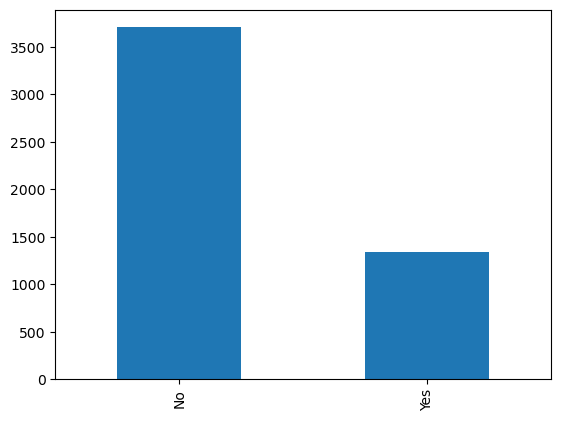

In [34]:
train_df['Churn'].value_counts().plot.bar()

In [35]:
train_df['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

In [36]:
train_df['Churn'].value_counts(normalize = True)

No     0.735026
Yes    0.264974
Name: Churn, dtype: float64

<AxesSubplot:>

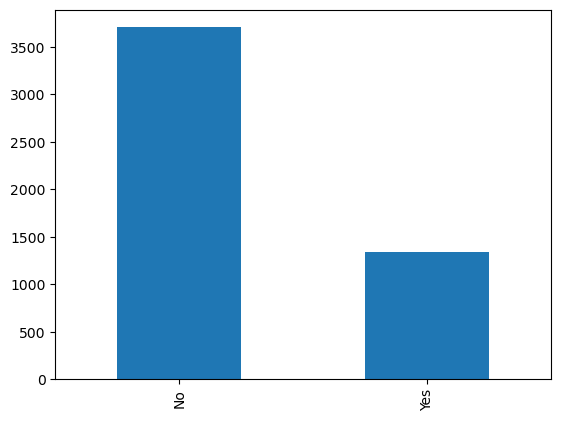

In [37]:
train_df['Churn'].value_counts().plot.bar()

From the graph, a total of 3706 which is about 74% of the total number 5,042 where No that is did not churn, while a total of 1,336 which is about 27% of the total number 5,042 where yes that is people that churn (left).

### Now let Visualize some variables

In [38]:
train_df['gender'].value_counts()

Male      2559
Female    2484
Name: gender, dtype: int64

In [39]:
train_df['gender'].value_counts(normalize = True)

Male      0.507436
Female    0.492564
Name: gender, dtype: float64

<AxesSubplot:>

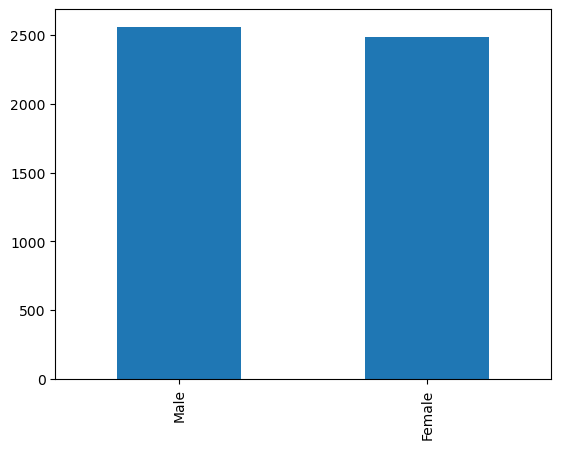

In [40]:
train_df['gender'].value_counts().plot.bar()

From the above graph, about 51% are Male while about 49% are Female in the entire dataset.

In [41]:
train_df['SeniorCitizen'].value_counts()

No     4224
Yes     819
Name: SeniorCitizen, dtype: int64

In [42]:
train_df['SeniorCitizen'].value_counts(normalize = True)

No     0.837597
Yes    0.162403
Name: SeniorCitizen, dtype: float64

<AxesSubplot:title={'center':'SeniorCitizen'}>

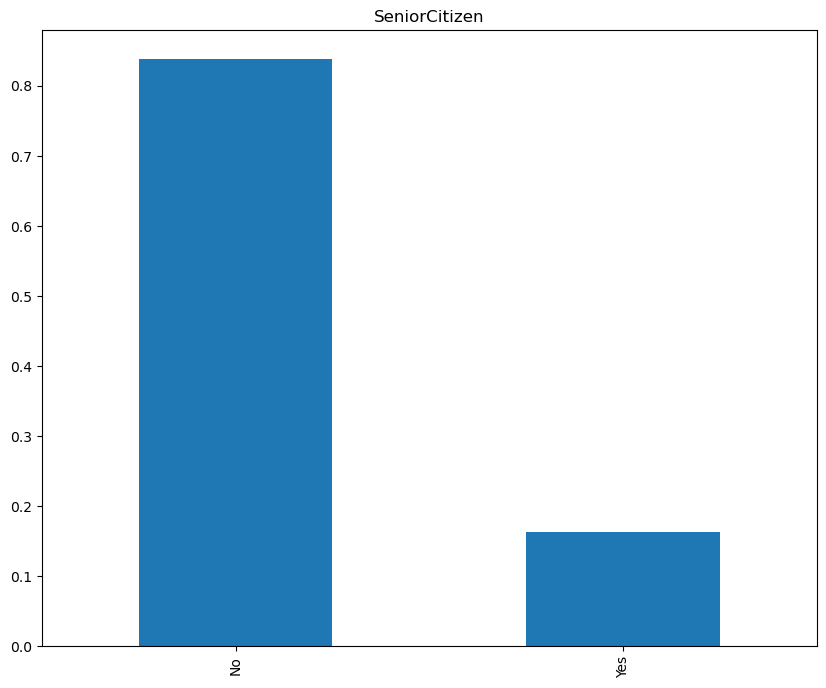

In [43]:
train_df['SeniorCitizen'].value_counts(normalize = True).plot.bar(figsize =(10,8), title = 'SeniorCitizen')

From the above graph, about 84% of the Senior Citizen did not Churn while about 16% churned.

In [44]:
train_df['Partner'].value_counts()

No     2585
Yes    2458
Name: Partner, dtype: int64

In [45]:
train_df['Partner'].value_counts(normalize = True)

No     0.512592
Yes    0.487408
Name: Partner, dtype: float64

<AxesSubplot:title={'center':'Partner'}>

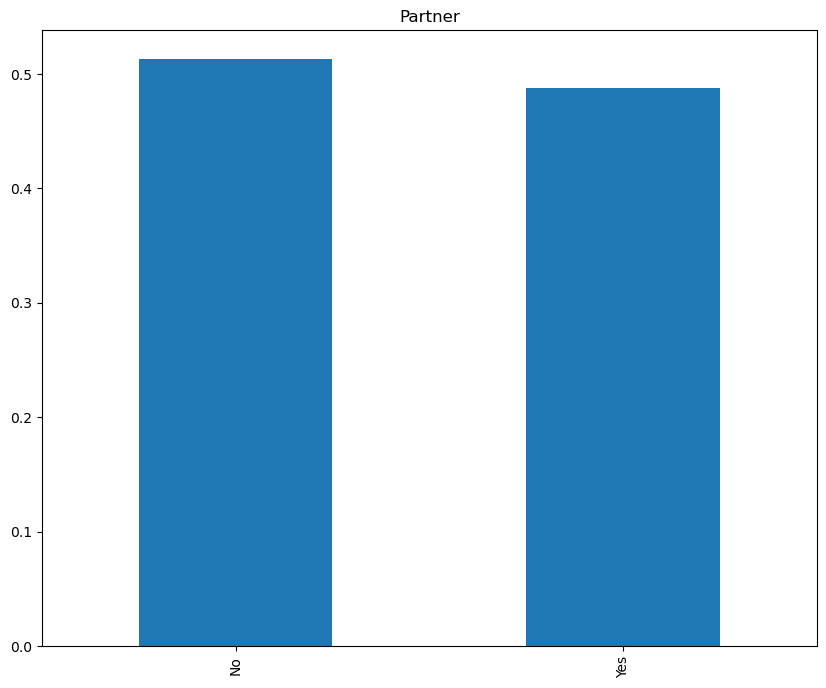

In [46]:
train_df['Partner'].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Partner')

In [47]:
train_df['Dependents'].value_counts()

No     3482
Yes    1561
Name: Dependents, dtype: int64

In [48]:
train_df['Dependents'].value_counts(normalize = True)

No     0.690462
Yes    0.309538
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

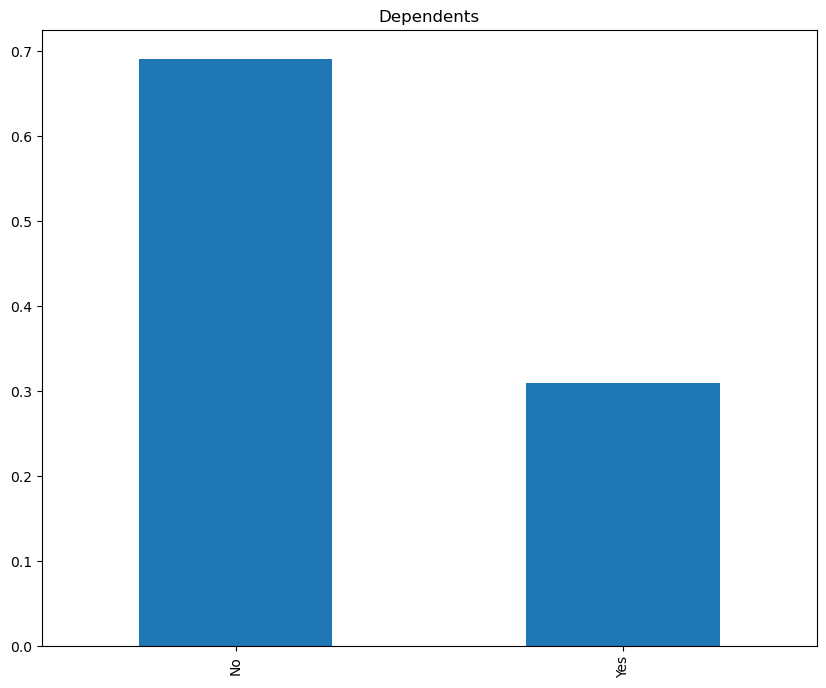

In [49]:
train_df['Dependents'].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Dependents')

In the above graph, about 69% of the Dependants did not Churn while about 31% Churned


## BIVARIATE ANALYSIS

### Let us look at the relationship between the target variable and the Categorical variables. With the Bar Plot below, we can see the proportion of the Churned (Yes) and Not Churn (No).

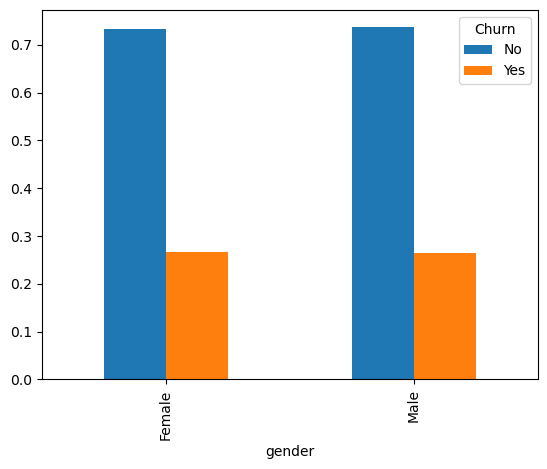

In [50]:
Gender = pd.crosstab(train_df['gender'],train_df['Churn'])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

About 7

In [51]:
#(train['gender'],train['Churn']).value_counts()

train_df[['gender','Churn']].value_counts()

gender  Churn
Male    No       1883
Female  No       1823
Male    Yes       675
Female  Yes       661
dtype: int64

In [52]:
train_df[['gender','Churn']].value_counts(normalize = True)

gender  Churn
Male    No       0.373463
Female  No       0.361563
Male    Yes      0.133875
Female  Yes      0.131099
dtype: float64

<AxesSubplot:title={'center':'Churn Rate'}, xlabel='gender,Churn'>

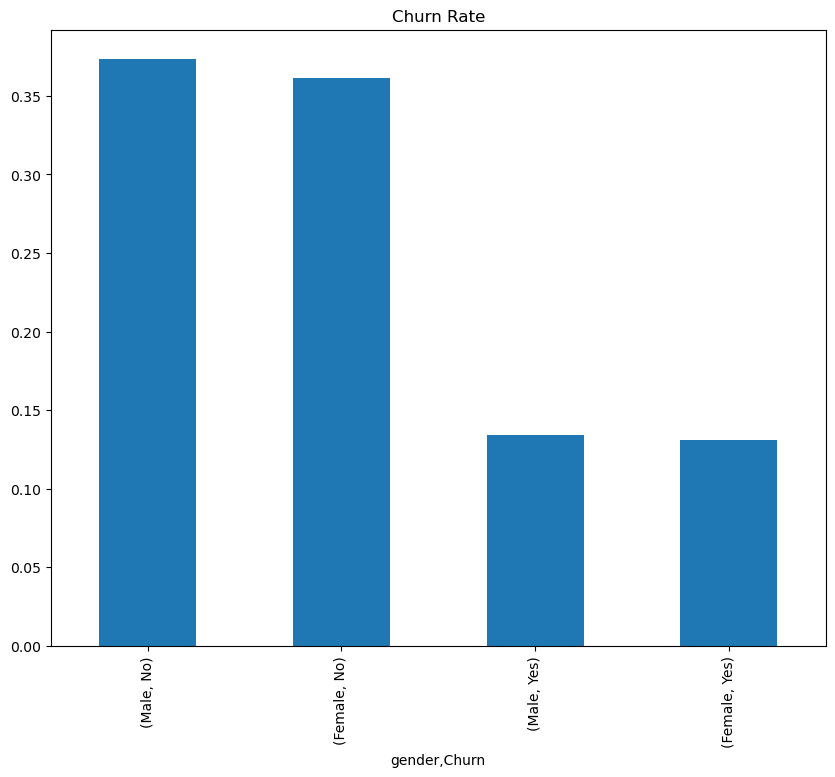

In [53]:
train_df[['gender','Churn']].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Churn Rate')

37% of male and 36% of female did not churn while 13.38% Male and 13.10 Female Churned. The churn rate of both male and female are closely related as they are almost the same as well as their retention rate.

## MULTIVARIATE ANALYSIS

Now, lets look at how three or more variables are related in the train dataset.

We shall be looking at the Numerical Columns to see how much they relate to one another.

In [54]:
# lets split our dataset into numeric and categorical datas

num_col = train_df.select_dtypes(exclude='object')

cat_col = train_df.select_dtypes(include='object')


In [55]:
num_col

tenure  MonthlyCharges  TotalCharges
0          1       29.850000     29.850000
1         34       56.950001   1889.500000
2          2       53.849998    108.150002
3         45       42.299999   1840.750000
4          2       70.699997    151.649994
...      ...             ...           ...
5038      24       84.800000   1990.500000
5039      72      103.200000   7362.900000
5040      11       29.600000    346.450000
5041       4       74.400000    306.600000
5042      66      105.650000   6844.500000

[5043 rows x 3 columns]

In [56]:
cat_col

customerID  gender SeniorCitizen Partner Dependents PhoneService  \
0     7590-VHVEG  Female            No     Yes         No           No   
1     5575-GNVDE    Male            No      No         No          Yes   
2     3668-QPYBK    Male            No      No         No          Yes   
3     7795-CFOCW    Male            No      No         No           No   
4     9237-HQITU  Female            No      No         No          Yes   
...          ...     ...           ...     ...        ...          ...   
5038  6840-RESVB    Male            No     Yes        Yes          Yes   
5039  2234-XADUH  Female            No     Yes        Yes          Yes   
5040  4801-JZAZL  Female            No     Yes        Yes           No   
5041  8361-LTMKD    Male           Yes     Yes         No          Yes   
5042  3186-AJIEK    Male            No      No         No          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0              NaN             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3              NaN             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
5038           Yes             DSL            Yes           No   
5039           Yes     Fiber optic             No          Yes   
5040            No             DSL            Yes           No   
5041           Yes     Fiber optic             No           No   
5042            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
5038              Yes         Yes         Yes             Yes        One year   
5039              Yes          No         Yes             Yes        One year   
5040               No          No          No              No  Month-to-month   
5041               No          No          No              No  Month-to-month   
5042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod Churn  
0                 Yes           Electronic check    No  
1                  No               Mailed check    No  
2                 Yes               Mailed check   Yes  
3                  No  Bank transfer (automatic)    No  
4                 Yes           Electronic check   Yes  
...               ...                        ...   ...  
5038              Yes               Mailed check    No  
5039              Yes    Credit card (automatic)    No  
5040              Yes           Electronic check    No  
5041              Yes               Mailed check   Yes  
5042              Yes  Bank transfer (automatic)    No  

[5043 rows x 18 columns]

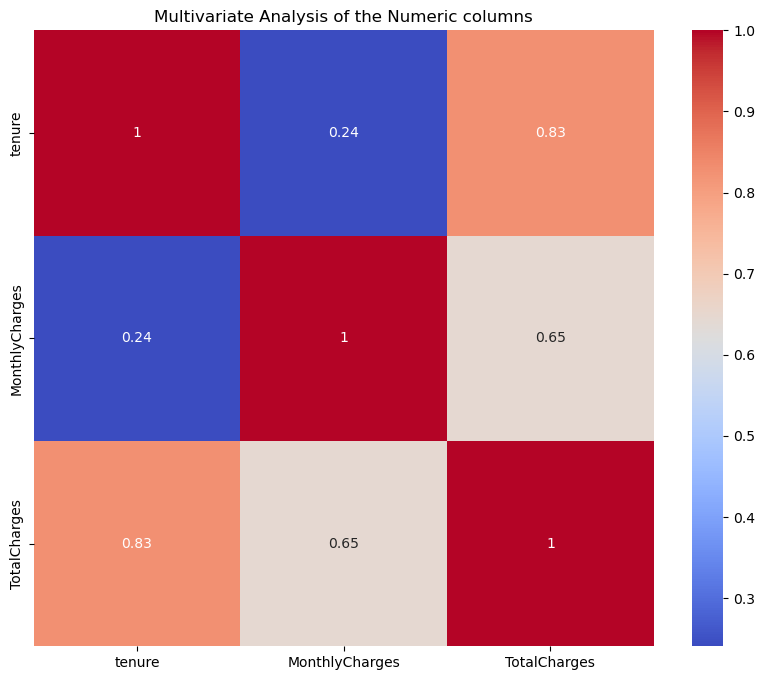

In [57]:
# Multivariate Analysis on the Numeric values

plt.figure(figsize=(10,8))
sns.heatmap(data = num_col.corr(), annot = True, cmap='coolwarm')
plt.title('Multivariate Analysis of the Numeric columns')
plt.show()

## FEATURE ENGINEERING

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. 

In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale.

In [58]:
train_df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
5038  6840-RESVB    Male            No     Yes        Yes      24   
5039  2234-XADUH  Female            No     Yes        Yes      72   
5040  4801-JZAZL  Female            No     Yes        Yes      11   
5041  8361-LTMKD    Male           Yes     Yes         No       4   
5042  3186-AJIEK    Male            No      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No           NaN             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No           NaN             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
5038          Yes           Yes             DSL            Yes  ...   
5039          Yes           Yes     Fiber optic             No  ...   
5040           No            No             DSL            Yes  ...   
5041          Yes           Yes     Fiber optic             No  ...   
5042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
5038              Yes         Yes         Yes             Yes        One year   
5039              Yes          No         Yes             Yes        One year   
5040               No          No          No              No  Month-to-month   
5041               No          No          No              No  Month-to-month   
5042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check      29.850000     29.850000   
1                  No               Mailed check      56.950001   1889.500000   
2                 Yes               Mailed check      53.849998    108.150002   
3                  No  Bank transfer (automatic)      42.299999   1840.750000   
4                 Yes           Electronic check      70.699997    151.649994   
...               ...                        ...            ...           ...   
5038              Yes               Mailed check      84.800000   1990.500000   
5039              Yes    Credit card (automatic)     103.200000   7362.900000   
5040              Yes           Electronic check      29.600000    346.450000   
5041              Yes               Mailed check      74.400000    306.600000   
5042              Yes  Bank transfer (automatic)     105.650000   6844.500000   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
5038     No  
5039     No  
5040     No  
5041    Yes  
5042     No  

[5043 rows x 21 columns]

In [59]:
# Dropping the Customer ID which is not relevant to the project.

train_df = train_df.drop(columns='customerID', axis=1)

train_df

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
5038    Male            No     Yes        Yes      24          Yes   
5039  Female            No     Yes        Yes      72          Yes   
5040  Female            No     Yes        Yes      11           No   
5041    Male           Yes     Yes         No       4          Yes   
5042    Male            No      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0              NaN             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3              NaN             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
5038           Yes             DSL            Yes           No   
5039           Yes     Fiber optic             No          Yes   
5040            No             DSL            Yes           No   
5041           Yes     Fiber optic             No           No   
5042            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
5038              Yes         Yes         Yes             Yes        One year   
5039              Yes          No         Yes             Yes        One year   
5040               No          No          No              No  Month-to-month   
5041               No          No          No              No  Month-to-month   
5042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check       29.850000   
1                  No               Mailed check       56.950001   
2                 Yes               Mailed check       53.849998   
3                  No  Bank transfer (automatic)       42.299999   
4                 Yes           Electronic check       70.699997   
...               ...                        ...             ...   
5038              Yes               Mailed check       84.800000   
5039              Yes    Credit card (automatic)      103.200000   
5040              Yes           Electronic check       29.600000   
5041              Yes               Mailed check       74.400000   
5042              Yes  Bank transfer (automatic)      105.650000   

      TotalCharges Churn  
0        29.850000    No  
1      1889.500000    No  
2       108.150002   Yes  
3      1840.750000    No  
4       151.649994   Yes  
...            ...   ...  
5038   1990.500000    No  
5039   7362.900000    No  
5040    346.450000    No  
5041    306.600000   Yes  
5042   6844.500000    No  

[5043 rows x 20 columns]

In [60]:
train_df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [61]:
# Filling the missing values with the mode of the features

train_df['Churn'].fillna(train_df['Churn'].mode()[0], inplace = True)

train_df['Churn'].fillna(train_df['Churn'].mode()[0], inplace = True)

train_df['TotalCharges'].fillna(train_df['TotalCharges'].mode()[0], inplace = True)

train_df['StreamingMovies'].fillna(train_df['StreamingMovies'].mode()[0], inplace = True)

train_df['StreamingTV'].fillna(train_df['StreamingTV'].mode()[0], inplace = True)

train_df['TechSupport'].fillna(train_df['TechSupport'].mode()[0], inplace = True)

train_df['DeviceProtection'].fillna(train_df['DeviceProtection'].mode()[0], inplace = True)

train_df['OnlineBackup'].fillna(train_df['OnlineBackup'].mode()[0], inplace = True)

#train_df['OnlineSecurity '].fillna(train_df['OnlineSecurity '].mode()[0], inplace = True)

train_df['MultipleLines'].fillna(train_df['MultipleLines'].mode()[0], inplace = True)

train_df = train_df.drop(columns='OnlineSecurity', axis=1)

In [62]:
train_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
# select independent variables

x = train_df.drop(columns='Churn')


# select dependent variables

y = train_df.loc[:, 'Churn']

# prove that the variables were selected correctly

print(x.columns)

# prove that the variables were selected correctly

print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')
Churn


In [64]:
x.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [65]:
x.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [67]:

# Seperating the train dataset into numerical and categorical variables

num_cols = x.select_dtypes(exclude='object').columns

cat_cols = x.select_dtypes(include='object').columns

### X - INPUT (INDEPENDENT VARIABLES) AND Y - OUTPUT VARIBLES (DEPENDENT VARIABLE) CREATION

First, we create a variable X to store the input (independent) attributes of the dataset. Additionally, we create a variable y to store only the output variable (Churn).

In [68]:
# APPLYING TRAIN_TEST

x_train,x_eval,y_train,y_eval = train_test_split(x, y,test_size=0.10,random_state=11, stratify = y)

print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)

print('Shape of x_eval and y_eval: ',x_eval.shape, y_eval.shape)

Shape of x_train and y_train:  (4538, 18) (4538,)
Shape of x_eval and y_eval:  (505, 18) (505,)


### NORMALIZING AND ENCODING OUR DATASET

In [69]:
# Applying OrdinalEnconder() for categorical binary variables and  StandardScaler() for numerical variables to scale it


cat_encoder = OrdinalEncoder()

num_scaler = StandardScaler()

# Apply SimpleImputer

num_imputer = SimpleImputer(strategy = 'median').set_output(transform = 'pandas')

cat_imputer = SimpleImputer(strategy = 'most_frequent').set_output(transform = 'pandas')


In [70]:
# Feature pipeline

num_pipe = Pipeline(steps = [('num_imputer', num_imputer), ('scaler', num_scaler)])

cat_pipe = Pipeline(steps = [('cat_imputer', cat_imputer), ('encoder', cat_encoder)])


In [71]:
# End2End_pipeline Features preprocessor 

preprocessor = ColumnTransformer([("StandardScaler", num_pipe, num_cols),
                                  ("OrdinalEncoder", cat_pipe, cat_cols),])
preprocessor.set_output(transform='pandas')



ColumnTransformer(transformers=[('StandardScaler',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('OrdinalEncoder',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [72]:
x_trained = preprocessor.fit_transform(x_train)

In [73]:
x_trained

StandardScaler__tenure  StandardScaler__MonthlyCharges  \
1742               -1.246440                        0.727326   
2073               -0.756352                       -1.522054   
1317               -1.205599                       -1.364849   
1157                1.203997                        1.088565   
898                -0.838034                        1.120340   
...                      ...                             ...   
3279                1.530722                       -1.346452   
3204                0.223822                       -1.356487   
3049               -1.287281                       -1.512020   
343                 1.244838                       -1.501986   
2029                1.408200                        0.842722   

      StandardScaler__TotalCharges  OrdinalEncoder__gender  \
1742                     -0.937415                     0.0   
2073                     -0.893371                     1.0   
1317                     -0.980314                     0.0   
1157                      1.596363                     0.0   
898                      -0.524632                     0.0   
...                            ...                     ...   
3279                     -0.229888                     1.0   
3204                     -0.597393                     1.0   
3049                     -1.009449                     0.0   
343                      -0.433372                     1.0   
2029                      1.649040                     1.0   

      OrdinalEncoder__SeniorCitizen  OrdinalEncoder__Partner  \
1742                            0.0                      0.0   
2073                            0.0                      0.0   
1317                            0.0                      0.0   
1157                            1.0                      1.0   
898                             0.0                      0.0   
...                             ...                      ...   
3279                            0.0                      1.0   
3204                            1.0                      1.0   
3049                            0.0                      0.0   
343                             0.0                      0.0   
2029                            0.0                      1.0   

      OrdinalEncoder__Dependents  OrdinalEncoder__PhoneService  \
1742                         0.0                           1.0   
2073                         0.0                           1.0   
1317                         0.0                           1.0   
1157                         0.0                           1.0   
898                          0.0                           1.0   
...                          ...                           ...   
3279                         1.0                           1.0   
3204                         0.0                           0.0   
3049                         0.0                           1.0   
343                          0.0                           1.0   
2029                         0.0                           1.0   

      OrdinalEncoder__MultipleLines  OrdinalEncoder__InternetService  \
1742                            0.0                              1.0   
2073                            0.0                              2.0   
1317                            1.0                              2.0   
1157                            1.0                              1.0   
898                             0.0                              1.0   
...                             ...                              ...   
3279                            1.0                              2.0   
3204                            0.0                              0.0   
3049                            0.0                              2.0   
343                             0.0                              2.0   
2029                            0.0                              1.0   

      OrdinalEncoder__OnlineBackup  OrdinalEncoder__DeviceProtect

In [74]:
x_eval_trained = preprocessor.fit_transform(x_eval)

In [75]:
# end2end Pipeline

clf_ = Pipeline([('preprocessor',preprocessor), ('model', None)]).set_output(transform = 'pandas')

clf_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', None)])

### DATA TRAINING USING THE .FIT METHOD

In [76]:
 clf_.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', None)])

## WE SHALL BE TRAINING OF THE FOLLOWING MODELS:

### 1) Logistic Regression.

### 2) Decision Trees.

### 3) Support Vector Machine.

### 4) Random Forest

### 5) KNeighborsClassifier

### OUR PERFORMANCE METRICS SHALL BE F1_SCORE

In [77]:
#Declaring our Performance metric

metric = f1_score

In [78]:
unique_labels = np.unique(y_train)

print(unique_labels)

['No' 'Yes']


In [79]:
pos_label = unique_labels[0]

In [157]:
# CREATE TRAINED MODELS LIST
models_trained = []

#models.append(('lr', LogisticRegression()))
#models.append(('dt_model', DecisionTreeClassifier()))
#models.append(('knn', KNeighborsClassifier()))
#models.append(('rf', RandomForestClassifier()))
#models.append(('svm', SVC()))



In [81]:
#models

## LOGISTIC REGRESSION MODEL

In [82]:
lr = Pipeline([('preprocessor',preprocessor), ('model', LogisticRegression(random_state=42))]).set_output(transform = 'pandas')

In [83]:
lr.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression(random_state=42))])

In [84]:
models_trained.append(lr)

In [184]:
# MODEL EVALUATION USING THE EVALSET DATASET

y_eval_pred_lr = lr.predict(x_eval)

In [186]:
# Calculation the f1_score performance metric on Logistic Regression

f1_lr = f1_score(y_eval, y_eval_pred_lr,pos_label=pos_label)

print(f'Logistic Regression Model F1_Score is: {f1_lr}')

Logistic Regression Model F1_Score is: 0.8113772455089819


In [87]:
print(classification_report(y_eval, y_eval_pred_lr))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       371
         Yes       0.64      0.57      0.60       134

    accuracy                           0.80       505
   macro avg       0.75      0.73      0.74       505
weighted avg       0.80      0.80      0.80       505



### TREATING IMBALACE DATASET.

FROM THE F1_SCORE IT SHOWS THAT OUR DATASET IS IMBALANCE. IT IS NOT NORMALLY DISTRIBUTED. AND THIS WILL AMKE OUR MAKE NOT MAKE A CORRECT PREDICTIONS.

#### WE WILL USE THE OVERSAMPLE TECHNIQUE TO SAMPLE OUR DATASET TO MAKE IT NORMALLY DISTRIBUTED. the smallest 

### OVERSAMPLE TECHNIQUE USING RANDOMOVERSAMPLER

Oversampling is a technique which increases the number of samples of the smallest class up to the size of the biggest class. This is done by generating synthetic samples. Different techniques can be applied to oversample a class. Such as RandomOverSampler and SMOTE. 

The over samplers provide a function, called fit_resample(), which receives the X_train input variable and the y_train output variable and return the over sampled input and output variables, respectively X_res and y_res.

In [88]:
over_sampler = RandomOverSampler(random_state=42)

x_res, y_res = over_sampler.fit_resample(x_train, y_train)

In [89]:
# APPLYING TRAIN_TEST TO THE RESAMPLED DATASET INPUT 'X_RES' AND OUTPUT 'Y_RES'

x_train_res,x_eval_res,y_train_res,y_eval_res = train_test_split(x_res, y_res,test_size=0.10,random_state=11, stratify = y_res)

print('Shape of x_train and y_train: ',x_train_res.shape, y_train_res.shape)

print('Shape of x_eval and y_eval: ',x_eval_res.shape, y_eval_res.shape)

Shape of x_train and y_train:  (6004, 18) (6004,)
Shape of x_eval and y_eval:  (668, 18) (668,)


In [90]:
# APPLYING THE RESAMPLED DATASET x_res AND y_res TO LINEAR REGRESSION MODEL.

model_02 = lr.fit(x_train_res, y_train_res)


In [91]:
# Model Evaluation

model_02.score(x_eval_res, y_eval_res)



0.7619760479041916

In [92]:
# Making Prediction with the resampled

y_pred_res = model_02.predict(x_eval_res)

In [93]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.79      0.72      0.75       334
         Yes       0.74      0.81      0.77       334

    accuracy                           0.76       668
   macro avg       0.76      0.76      0.76       668
weighted avg       0.76      0.76      0.76       668



In [94]:
#print(f1_score(y_eval, y_pred,pos_label=pos_label))

In [95]:
# Comapring imbalance and balanced results

#lr.score(x_eval, y_eval), model_02.score(x_eval_res, y_eval_res)

## DECISION TREE MODEL

In [96]:
dt_model = Pipeline([('preprocessor',preprocessor), ('model', DecisionTreeClassifier(random_state=40))]).set_output(transform = 'pandas')

In [97]:
dt_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=40))])

In [98]:
models_trained.append(dt_model)

In [187]:
y_eval_pred_dt = dt_model.predict(x_eval)

In [188]:
print(classification_report(y_eval, y_eval_pred_dt))

              precision    recall  f1-score   support

          No       0.82      0.82      0.82       371
         Yes       0.50      0.51      0.51       134

    accuracy                           0.74       505
   macro avg       0.66      0.66      0.66       505
weighted avg       0.74      0.74      0.74       505



In [189]:
# Calculation the f1_score performance metric on Decision tree model

f1_dt = f1_score(y_eval, y_eval_pred_dt,pos_label=pos_label)

print(f'Decision Tree Model F1_Score is: {f1_dt}')

Decision Tree Model F1_Score is: 0.8205128205128205


In [102]:
# APPLYING THE RESAMPLED DATASET TO OUR DECISION TREE MODEL

dt_model.fit(x_train_res, y_train_res)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier(random_state=40))])

In [103]:
# Evaluating the model

dt_model.score(x_eval_res, y_eval_res)

0.8652694610778443

In [104]:
# Prediction

y_pred_res = dt_model.predict(x_eval_res)

In [105]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.95      0.77      0.85       334
         Yes       0.81      0.96      0.88       334

    accuracy                           0.87       668
   macro avg       0.88      0.87      0.86       668
weighted avg       0.88      0.87      0.86       668



In [106]:
# COMPARING IMBALANCED AND BALANCED DATA

#dt_model.score(x_eval, y_eval), dt_model.score(x_eval_res, y_eval_res)

## SUPPORT VECTOR MACHINE MODEL

In [107]:
svm = Pipeline([('preprocessor',preprocessor), ('model', SVC(random_state=30))]).set_output(transform = 'pandas')

In [108]:
svm.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=30))])

In [109]:
models_trained.append(svm)

In [190]:
y_eval_pred_svm = svm.predict(x_eval)

In [191]:
print(classification_report(y_eval, y_eval_pred_svm))

              precision    recall  f1-score   support

          No       0.92      0.75      0.83       371
         Yes       0.55      0.81      0.65       134

    accuracy                           0.77       505
   macro avg       0.73      0.78      0.74       505
weighted avg       0.82      0.77      0.78       505



In [193]:
# Calculation the f1_score performance metric on Support Vector machine

f1_svm = f1_score(y_eval, y_eval_pred_svm,pos_label=pos_label)

print(f'Support Vector Machine F1_Score is: {f1_svm}')

Support Vector Machine F1_Score is: 0.8284023668639054


In [113]:
# APPLYING THE RESAMPLED DATASET TO OUR SUPPORT VECTOR MACHINE MODEL

svm.fit(x_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=30))])

In [114]:
# Evaluate our Model

svm.score(x_eval_res, y_eval_res)

0.7634730538922155

In [115]:
# Making Prediction

y_pred_res = svm.predict(x_eval_res)

In [116]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.80      0.71      0.75       334
         Yes       0.74      0.82      0.78       334

    accuracy                           0.76       668
   macro avg       0.77      0.76      0.76       668
weighted avg       0.77      0.76      0.76       668



In [117]:
# COMPARING IMBALANCED AND BALANCED DATA

#svm.score(x_eval, y_eval), svm.score(x_eval_res, y_eval_res)

## RANDOM FOREST CLASSIFIER MODEL

In [118]:
rf = Pipeline([('preprocessor',preprocessor), ('model', RandomForestClassifier(random_state=10))]).set_output(transform = 'pandas')

In [119]:
 rf.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=10))])

In [120]:
models_trained.append(rf)

In [194]:
y_eval_pred_rf = rf.predict(x_eval)

In [195]:
print(classification_report(y_eval, y_eval_pred_rf))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       371
         Yes       0.66      0.60      0.63       134

    accuracy                           0.81       505
   macro avg       0.76      0.75      0.75       505
weighted avg       0.81      0.81      0.81       505



In [197]:
# Calculation the f1_score performance metric on RandomForestClassifier

f1_rf = f1_score(y_eval, y_eval_pred_rf,pos_label=pos_label)

print(f'Random Forest Classifier Model F1_Score is: {f1_rf}')

Random Forest Classifier Model F1_Score is: 0.8753315649867374


In [124]:
# APPLYING THE RESAMPLED DATASET TO OUR RANDOM FOREST MODEL

rf.fit(x_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=10))])

In [125]:
# EVALUATING OUR BALANCED DATASET

rf.score(x_eval_res, y_eval_res)

0.8952095808383234

In [126]:
y_pred_res = rf.predict(x_eval_res)

In [127]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.96      0.82      0.89       334
         Yes       0.85      0.97      0.90       334

    accuracy                           0.90       668
   macro avg       0.90      0.90      0.89       668
weighted avg       0.90      0.90      0.89       668



In [128]:
# COMPARING IMBALANCED AND BALANCED DATA

#rf.score(x_eval, y_eval), rf.score(x_eval_res, y_eval_res)

## KNEIGHBORSCLASSIFIER MODEL

In [129]:
knn = Pipeline([('preprocessor',preprocessor), ('model', KNeighborsClassifier())]).set_output(transform = 'pandas')

In [130]:
knn.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [131]:
models_trained.append(knn)

In [198]:
# Evaluate the model on the evaluation dataset (Evalset)

y_eval_pred_knn = knn.predict(x_eval)

In [199]:
print(classification_report(y_eval, y_eval_pred_knn))

              precision    recall  f1-score   support

          No       0.88      0.66      0.75       371
         Yes       0.45      0.76      0.56       134

    accuracy                           0.69       505
   macro avg       0.66      0.71      0.66       505
weighted avg       0.77      0.69      0.70       505



In [201]:
# Calculation the f1_score performance metric on Logistic Regression

f1_knn = f1_score(y_eval, y_eval_pred_knn,pos_label=pos_label)

print(f' KNeighborsClassifier Model F1_Score is: {f1_knn}')

 KNeighborsClassifier Model F1_Score is: 0.7542503863987636


In [202]:
# APPLYING THE RESAMPLED DATASET TO OUR KNN MODEL

knn.fit(x_train_res, y_train_res)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [136]:
knn.score(x_eval_res, y_eval_res)

0.7739520958083832

In [137]:
y_pred_res = knn.predict(x_eval_res)

In [138]:
print(classification_report(y_eval_res, y_pred_res))

              precision    recall  f1-score   support

          No       0.85      0.66      0.75       334
         Yes       0.72      0.88      0.80       334

    accuracy                           0.77       668
   macro avg       0.79      0.77      0.77       668
weighted avg       0.79      0.77      0.77       668



In [139]:
# COMPARING THE IMBALANCED AND BALANCED DATASET

#knn.score(x_eval, y_eval), knn.score(x_eval_res, y_eval_res)

### COMPARING OUR MODEL

In [203]:
# F1-SCORES FOR ALL THE MODELS

#F1_Score_lr = f1_score(y_eval, lr_y_pred,pos_label=pos_label)
#F1_Score_dt = f1_score(y_eval, dt_y_pred,pos_label=pos_label)
#F1_Score_svm = f1_score(y_eval, svm_y_pred,pos_label=pos_label)
#F1_Score_rf = f1_score(y_eval, rf_y_pred,pos_label=pos_label)
#F1_Score_knn = f1_score(y_eval, knn_y_pred,pos_label=pos_label)

# PRINTING THE F1_SCORE RESULTS

print(f'Logistic Regression F1_Score is: {f1_lr}')

print()
print(f'Decision Tree Model F1_Score is: {f1_dt}')

print()
print(f'Support Vector Machine F1_Score is: {f1_svm}')

print()
print(f'Random Forest Classifier F1_Score is: {f1_rf}')

print()
print(f' KNeighborsClassifier F1_Score is: {f1_knn}')

Logistic Regression F1_Score is: 0.8113772455089819

Decision Tree Model F1_Score is: 0.8205128205128205

Support Vector Machine F1_Score is: 0.8284023668639054

Random Forest Classifier F1_Score is: 0.8753315649867374

 KNeighborsClassifier F1_Score is: 0.7542503863987636


### From the above information, our three best performing models using f1_score metric are:

### 1. RandomForestClassifier (0.875) = 88%

### 2. Support Vector Machine (0.828) = 83%

### 3. Decision Tree (0.821) = 82%


In [172]:
# CREATE A MODEL LIST TO BE TRAINED

#models = [('Logistic Regression', LogisticRegression()),
          #('Decision Tree', DecisionTreeClassifier()), 
          #('KNeighbors', KNeighborsClassifier()), 
          #('Random Forest', RandomForestClassifier()), 
          #('Support Vector Machine', SVC())
         #]


#results_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score','Balanced_Accuracy'])


In [173]:
#for model_name, model in models:
    #model.fit(x_trained, y_train)



In [174]:
#y_eval_pred = model.predict(x_eval_trained)

In [175]:
#performance metrics

#accuracy = accuracy_score(y_eval, y_eval_pred)
#precision = precision_score(y_eval, y_eval_pred, pos_label=pos_label)
#recall = recall_score(y_eval, y_eval_pred,pos_label=pos_label)
#f1 = f1_score(y_eval, y_eval_pred, pos_label=pos_label)
#balanced = balanced_accuracy_score(y_eval, y_eval_pred)


In [205]:
#results_df = results_df.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision,
                           #'Recall': recall, 'F1_Score': f1, 'Balanced_Accuracy':balanced}, ignore_index = True)


#pd.set_option('display.max_rows', None)

#results_df

In [206]:
#info = [{'Model_Name': models.__str__(), f'Metric({metric.__name__})': 
         #metric(y_true = y_eval),
         #y_eval_pred = models.predict(x_eval),
         #pos_label = 'Yes'
         #)}for models in models_trained]

### HYPERPARAMETER TUNING OF OUR THREE BEST MODELS

In [213]:
# Creating a holder for the best model

best_models_trained =[]

In [214]:
# Encoding the y variable

le = LabelEncoder().fit(y)

In [215]:
# OUR BEST MODELS

model2 = [rf, svm, dt_model]


## HYPERPARAMETER TUNING OF THE 1ST MODEL

In [216]:
# Getting parameters for the first model in the list - rf model

model2[0].get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('StandardScaler',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                   ('OrdinalEncoder',
                                    Pipeline(steps=[('cat_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OrdinalEncoder())]),
                                    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       

In [217]:
  # Manually Selecting different parameters to check
    
parameters = {
  'model__n_estimators':[1,10,100,1000],
  'model__min_samples_split': [2,3,4,5]
  }

In [220]:
# instantiate the searcher

searcher = GridSearchCV(estimator = model2[0], 
                    param_grid = parameters, 
                    scoring = ['accuracy', 'f1', 'precision', 'recall','balanced_accuracy','roc_auc'],
                    refit = 'f1',
                    cv = 5,
                    verbose = 3)

In [223]:
# fit

searcher.fit(x_train, le.transform(y_train))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.727) balanced_accuracy: (test=0.647) f1: (test=0.481) precision: (test=0.485) recall: (test=0.477) roc_auc: (test=0.647) total time=   0.1s
[CV 2/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.716) balanced_accuracy: (test=0.650) f1: (test=0.488) precision: (test=0.468) recall: (test=0.510) roc_auc: (test=0.650) total time=   0.1s
[CV 3/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.748) balanced_accuracy: (test=0.668) f1: (test=0.512) precision: (test=0.524) recall: (test=0.500) roc_auc: (test=0.668) total time=   0.0s
[CV 4/5] END model__min_samples_split=2, model__n_estimators=1; accuracy: (test=0.725) balanced_accuracy: (test=0.651) f1: (test=0.487) precision: (test=0.482) recall: (test=0.492) roc_auc: (test=0.650) total time=   0.1s
[CV 5/5] END model__min_samples_split=2, model__n_e

[CV 3/5] END model__min_samples_split=3, model__n_estimators=1000; accuracy: (test=0.802) balanced_accuracy: (test=0.706) f1: (test=0.573) precision: (test=0.665) recall: (test=0.504) roc_auc: (test=0.838) total time=  11.7s
[CV 4/5] END model__min_samples_split=3, model__n_estimators=1000; accuracy: (test=0.795) balanced_accuracy: (test=0.709) f1: (test=0.575) precision: (test=0.636) recall: (test=0.525) roc_auc: (test=0.827) total time=  10.0s
[CV 5/5] END model__min_samples_split=3, model__n_estimators=1000; accuracy: (test=0.819) balanced_accuracy: (test=0.730) f1: (test=0.613) precision: (test=0.707) recall: (test=0.542) roc_auc: (test=0.846) total time=  10.5s
[CV 1/5] END model__min_samples_split=4, model__n_estimators=1; accuracy: (test=0.724) balanced_accuracy: (test=0.634) f1: (test=0.460) precision: (test=0.478) recall: (test=0.444) roc_auc: (test=0.679) total time=   0.0s
[CV 2/5] END model__min_samples_split=4, model__n_estimators=1; accuracy: (test=0.725) balanced_accurac

[CV 5/5] END model__min_samples_split=5, model__n_estimators=100; accuracy: (test=0.820) balanced_accuracy: (test=0.734) f1: (test=0.618) precision: (test=0.706) recall: (test=0.550) roc_auc: (test=0.849) total time=   0.9s
[CV 1/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.793) balanced_accuracy: (test=0.705) f1: (test=0.571) precision: (test=0.635) recall: (test=0.519) roc_auc: (test=0.835) total time=  10.7s
[CV 2/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.798) balanced_accuracy: (test=0.699) f1: (test=0.561) precision: (test=0.665) recall: (test=0.485) roc_auc: (test=0.839) total time=  10.1s
[CV 3/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.801) balanced_accuracy: (test=0.703) f1: (test=0.568) precision: (test=0.665) recall: (test=0.496) roc_auc: (test=0.839) total time=   9.1s
[CV 4/5] END model__min_samples_split=5, model__n_estimators=1000; accuracy: (test=0.792) balanced_ac

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('StandardScaler',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('OrdinalEncoder',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_f...
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestClassifier(random_state=10))]),
             param_grid={'model__min_samples_split': [2, 3, 4, 5],
                         'model__n_estimators': [1, 10, 100, 1000]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall',
                      'balanced_accuracy', 'roc_auc'],
             verbose=3)

In [224]:
searcher.best_params_

{'model__min_samples_split': 5, 'model__n_estimators': 1000}

In [225]:
searcher.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   Ordina...oder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(min_samples_split=5, n_estimators=1000,
                                        random_state=10))])

In [226]:
best_models_trained.append(searcher.best_estimator_)

## HYPERPARAMETER TUNING OF THE 2ND MODEL

In [227]:
#  Getting parameters for the second model in the list - Support Vector Machine model


model2[1].get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('StandardScaler',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                   ('OrdinalEncoder',
                                    Pipeline(steps=[('cat_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OrdinalEncoder())]),
                                    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       

In [228]:
  # Manually Selecting different parameters to check
    
parameters2 = {
  'model__random_state':[30],
  'model__degree':[3,4,5,6,7],
  'model__max_iter':[-1,1,2,3,4]
  }

In [229]:
# instantiate the searcher

searcher2 = GridSearchCV(estimator = model2[1], 
                    param_grid = parameters2, 
                    scoring = ['accuracy', 'f1', 'precision', 'recall','balanced_accuracy','roc_auc'],
                    refit = 'f1',
                    cv = 5,
                    verbose = 3)

In [230]:
# fit

searcher2.fit(x_train, le.transform(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.805) balanced_accuracy: (test=0.708) f1: (test=0.578) precision: (test=0.680) recall: (test=0.502) roc_auc: (test=0.807) total time=   1.4s
[CV 2/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.798) balanced_accuracy: (test=0.683) f1: (test=0.534) precision: (test=0.691) recall: (test=0.436) roc_auc: (test=0.788) total time=   1.3s
[CV 3/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.795) balanced_accuracy: (test=0.683) f1: (test=0.535) precision: (test=0.669) recall: (test=0.446) roc_auc: (test=0.816) total time=   1.3s
[CV 4/5] END model__degree=3, model__max_iter=-1, model__random_state=30; accuracy: (test=0.803) balanced_accuracy: (test=0.696) f1: (test=0.558) precision: (test=0.685) recall: (test=0.471) roc_auc: (test=0.800) total time=   1.8s
[CV 5/5] E

[CV 3/5] END model__degree=4, model__max_iter=2, model__random_state=30; accuracy: (test=0.709) balanced_accuracy: (test=0.622) f1: (test=0.443) precision: (test=0.449) recall: (test=0.438) roc_auc: (test=0.690) total time=   0.1s
[CV 4/5] END model__degree=4, model__max_iter=2, model__random_state=30; accuracy: (test=0.680) balanced_accuracy: (test=0.495) f1: (test=0.142) precision: (test=0.245) recall: (test=0.100) roc_auc: (test=0.604) total time=   0.0s
[CV 5/5] END model__degree=4, model__max_iter=2, model__random_state=30; accuracy: (test=0.729) balanced_accuracy: (test=0.676) f1: (test=0.523) precision: (test=0.489) recall: (test=0.562) roc_auc: (test=0.738) total time=   0.1s
[CV 1/5] END model__degree=4, model__max_iter=3, model__random_state=30; accuracy: (test=0.716) balanced_accuracy: (test=0.514) f1: (test=0.134) precision: (test=0.351) recall: (test=0.083) roc_auc: (test=0.713) total time=   0.0s
[CV 2/5] END model__degree=4, model__max_iter=3, model__random_state=30; acc

[CV 4/5] END model__degree=5, model__max_iter=4, model__random_state=30; accuracy: (test=0.719) balanced_accuracy: (test=0.642) f1: (test=0.474) precision: (test=0.469) recall: (test=0.479) roc_auc: (test=0.723) total time=   0.1s
[CV 5/5] END model__degree=5, model__max_iter=4, model__random_state=30; accuracy: (test=0.760) balanced_accuracy: (test=0.667) f1: (test=0.509) precision: (test=0.554) recall: (test=0.471) roc_auc: (test=0.747) total time=   0.0s
[CV 1/5] END model__degree=6, model__max_iter=-1, model__random_state=30; accuracy: (test=0.805) balanced_accuracy: (test=0.708) f1: (test=0.578) precision: (test=0.680) recall: (test=0.502) roc_auc: (test=0.807) total time=   1.3s
[CV 2/5] END model__degree=6, model__max_iter=-1, model__random_state=30; accuracy: (test=0.798) balanced_accuracy: (test=0.683) f1: (test=0.534) precision: (test=0.691) recall: (test=0.436) roc_auc: (test=0.788) total time=   1.4s
[CV 3/5] END model__degree=6, model__max_iter=-1, model__random_state=30; 

[CV 1/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.696) balanced_accuracy: (test=0.508) f1: (test=0.159) precision: (test=0.299) recall: (test=0.108) roc_auc: (test=0.634) total time=   0.0s
[CV 2/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.709) balanced_accuracy: (test=0.533) f1: (test=0.224) precision: (test=0.384) recall: (test=0.158) roc_auc: (test=0.634) total time=   0.0s
[CV 3/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.709) balanced_accuracy: (test=0.622) f1: (test=0.443) precision: (test=0.449) recall: (test=0.438) roc_auc: (test=0.690) total time=   0.0s
[CV 4/5] END model__degree=7, model__max_iter=2, model__random_state=30; accuracy: (test=0.680) balanced_accuracy: (test=0.495) f1: (test=0.142) precision: (test=0.245) recall: (test=0.100) roc_auc: (test=0.604) total time=   0.0s
[CV 5/5] END model__degree=7, model__max_iter=2, model__random_state=30; acc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('StandardScaler',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('OrdinalEncoder',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_f...
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('model', SVC(random_state=30))]),
             param_grid={'model__degree': [3, 4, 5, 6, 7],
                         'model__max_iter': [-1, 1, 2, 3, 4],
                         'model__random_state': [30]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall',
                      'balanced_accuracy', 'roc_auc'],
             verbose=3)

In [231]:
searcher2.best_params_

{'model__degree': 3, 'model__max_iter': -1, 'model__random_state': 30}

In [232]:
searcher2.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC(random_state=30))])

In [233]:
best_models_trained.append(searcher2.best_estimator_)

## HYPERPARAMETER TUNING OF THE 3RD MODEL

In [234]:
#  Getting parameters for the second model in the list - Decision Tree model


model2[2].get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('StandardScaler',
                                    Pipeline(steps=[('num_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                   ('OrdinalEncoder',
                                    Pipeline(steps=[('cat_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OrdinalEncoder())]),
                                    Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
          'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       

In [235]:
# make lists of different parameters to check
parameters3 = {
  'model__min_samples_leaf':[1,3,4,5,6],
  'model__random_state': [40],
  'model__min_samples_split':[1,2,3,4,5],
  'model__ccp_alpha':[0.0, 1.0,2.0,3.0,4.0]
  }


In [236]:
# instantiate the searcher

searcher3 = GridSearchCV(estimator = model2[2], 
                    param_grid = parameters3, 
                    scoring = ['accuracy', 'f1', 'precision', 'recall','balanced_accuracy','roc_auc'],
                    refit = 'f1',
                    cv = 5,
                    verbose = 3)

In [237]:
# fit

searcher3.fit(x_train, le.transform(y_train))

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END model__ccp_alpha=0.0, model__min_samples_leaf=1, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (te

[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.746) balanced_accuracy: (test=0.660) f1: (test=0.499) precision: (test=0.520) recall: (test=0.479) roc_auc: (test=0.718) total time=   0.1s
[CV 4/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.744) balanced_accuracy: (test=0.681) f1: (test=0.530) precision: (test=0.516) recall: (test=0.546) roc_auc: (test=0.727) total time=   0.0s
[CV 5/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.730) balanced_accuracy: (test=0.636) f1: (test=0.462) precision: (test=0.488) recall: (test=0.438) roc_auc: (test=0.701) total time=   0.1s
[CV 1/5] END model__ccp_alpha=0.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.718) balanced_accuracy: (test=0.648) f1: (test=0.484

[CV 5/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.727) balanced_accuracy: (test=0.629) f1: (test=0.449) precision: (test=0.481) recall: (test=0.421) roc_auc: (test=0.726) total time=   0.1s
[CV 1/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.741) balanced_accuracy: (test=0.661) f1: (test=0.501) precision: (test=0.513) recall: (test=0.490) roc_auc: (test=0.697) total time=   0.0s
[CV 2/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.748) balanced_accuracy: (test=0.651) f1: (test=0.483) precision: (test=0.530) recall: (test=0.444) roc_auc: (test=0.729) total time=   0.1s
[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.767) balanced_accuracy: (test=0.670) f1: (test=0.514

[CV 2/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.742) balanced_accuracy: (test=0.670) f1: (test=0.515) precision: (test=0.515) recall: (test=0.515) roc_auc: (test=0.753) total time=   0.1s
[CV 3/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.759) balanced_accuracy: (test=0.673) f1: (test=0.519) precision: (test=0.549) recall: (test=0.492) roc_auc: (test=0.757) total time=   0.0s
[CV 4/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.768) balanced_accuracy: (test=0.685) f1: (test=0.537) precision: (test=0.570) recall: (test=0.508) roc_auc: (test=0.761) total time=   0.1s
[CV 5/5] END model__ccp_alpha=0.0, model__min_samples_leaf=5, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.734) balanced_accuracy: (test=0.634) f1: (test=0.456

[CV 1/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.2s
[CV 2/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 2/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 3/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=1.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=1.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 2/5] END model__ccp_alpha=1.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END model__ccp_alpha=1.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END model__ccp_alpha=1.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 5/5] END model__ccp_alpha=1.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan)

[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.2s
[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=1, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 4/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=2.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 5/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 2/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 1/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END model__ccp_alpha=2.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan)

[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END model__ccp_alpha=3.0, model__min_samples_leaf=1, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 2/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 4/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=4, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 5/5] END model__ccp_alpha=3.0, model__min_samples_leaf=6, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 1/5] END model__ccp_alpha=3.0, model__min_samples_leaf=6, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END model__ccp_alpha=3.0, model__min_samples_leaf=6, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/5] END model__ccp_alpha=3.0, model__min_samples_leaf=6, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision:

[CV 2/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 3/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=4.0, model__min_samples_leaf=1, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 5/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=4, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 1/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.0s
[CV 2/5] END model__ccp_alpha=4.0, model__min_samples_leaf=3, model__min_samples_split=5, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

[CV 1/5] END model__ccp_alpha=4.0, model__min_samples_leaf=5, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 2/5] END model__ccp_alpha=4.0, model__min_samples_leaf=5, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 3/5] END model__ccp_alpha=4.0, model__min_samples_leaf=5, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) roc_auc: (test=nan) total time=   0.0s
[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=5, model__min_samples_split=1, model__random_state=40; accuracy: (test=nan) balanced_accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan)

[CV 3/5] END model__ccp_alpha=4.0, model__min_samples_leaf=6, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.736) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 4/5] END model__ccp_alpha=4.0, model__min_samples_leaf=6, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 5/5] END model__ccp_alpha=4.0, model__min_samples_leaf=6, model__min_samples_split=2, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000) precision: (test=0.000) recall: (test=0.000) roc_auc: (test=0.500) total time=   0.1s
[CV 1/5] END model__ccp_alpha=4.0, model__min_samples_leaf=6, model__min_samples_split=3, model__random_state=40; accuracy: (test=0.735) balanced_accuracy: (test=0.500) f1: (test=0.000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('StandardScaler',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('OrdinalEncoder',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_f...
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=40))]),
             param_grid={'model__ccp_alpha': [0.0, 1.0, 2.0, 3.0, 4.0],
                         'model__min_samples_leaf': [1, 3, 4, 5, 6],
                         'model__min_samples_split': [1, 2, 3, 4, 5],
                         'model__random_state': [40]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall',
                      'balanced_accuracy', 'roc_auc'],
             verbose=3)

In [238]:
searcher3.best_params_

{'model__ccp_alpha': 0.0,
 'model__min_samples_leaf': 6,
 'model__min_samples_split': 2,
 'model__random_state': 40}

In [239]:
searcher3.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(min_samples_leaf=6, random_state=40))])

In [240]:
best_models_trained.append(searcher3.best_estimator_)

### MODELS COMPARISON

In [246]:
best_models_trained

[Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('StandardScaler',
                                                   Pipeline(steps=[('num_imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                  ('OrdinalEncoder',
                                                   Pipeline(steps=[('cat_imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('encoder',
                                                                    Ordina...oder(

### EXPORTING KEY COMPONENTS

In [262]:
searcher_best_estimators = best_models_trained

components = {'num_imputer': num_imputer, 'cat_imputer': cat_imputer, 
              'encoder': OrdinalEncoder, 'scaler': StandardScaler,
              'models': model2, 
              'searcher_best_estimator':best_models_trained
              }

In [252]:
# creating file called export to hold the components

!mkdir export

In [255]:
destination = os.path.join('.', 'export')

In [263]:
with open(os.path.join(destination, 'ml.pkl'), 'wb') as f:
    pickle.dump(components, f)


In [264]:
!pip freeze > export/requirements.txt

In [271]:
#!zip - r export.zip export/

'zip' is not recognized as an internal or external command,
operable program or batch file.


## HYPOTHESIS TESTING


### HYPOTHESIS STATEMENT

#### H0: CHURN RATE IS NOT DEPENDENT ON THE GENDER

#### H1: CHURN RATE IS DEPENDENT ON THE GENDER


### ANALYTICAL QUESTIONS

#### 1) What is the total charges of all the services

#### 2) What is the total charges of males and females respectively.

#### 3) Which services has the highest churn rate

#### 4) Which Services has the highest charge

#### 5) Which Gender churn the most.

In [273]:
train_df

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female            No     Yes         No       1           No   
1       Male            No      No         No      34          Yes   
2       Male            No      No         No       2          Yes   
3       Male            No      No         No      45           No   
4     Female            No      No         No       2          Yes   
5     Female            No      No         No       8          Yes   
6       Male            No      No        Yes      22          Yes   
7     Female            No      No         No      10           No   
8     Female            No     Yes         No      28          Yes   
9       Male            No      No        Yes      62          Yes   
10      Male            No     Yes        Yes      13          Yes   
11      Male            No      No         No      16          Yes   
12      Male            No     Yes         No      58          Yes   
13      Male            No      No         No      49          Yes   
14      Male            No      No         No      25          Yes   
15    Female            No     Yes        Yes      69          Yes   
16    Female            No      No         No      52          Yes   
17      Male            No      No        Yes      71          Yes   
18    Female            No     Yes        Yes      10          Yes   
19    Female            No      No         No      21          Yes   
20      Male           Yes      No         No       1           No   
21      Male            No     Yes         No      12          Yes   
22      Male            No      No         No       1          Yes   
23    Female            No     Yes         No      58          Yes   
24      Male            No     Yes        Yes      49          Yes   
25    Female            No      No         No      30          Yes   
26      Male            No     Yes        Yes      47          Yes   
27      Male            No     Yes        Yes       1           No   
28      Male            No     Yes         No      72          Yes   
29    Female            No      No        Yes      17          Yes   
30    Female           Yes     Yes         No      71          Yes   
31      Male           Yes     Yes         No       2          Yes   
32    Female            No     Yes        Yes      27          Yes   
33      Male            No      No         No       1          Yes   
34      Male           Yes      No         No       1          Yes   
35    Female            No     Yes        Yes      72          Yes   
36      Male            No      No         No       5          Yes   
37    Female            No      No         No      46          Yes   
38      Male            No      No         No      34          Yes   
39    Female            No      No         No      11          Yes   
40      Male            No     Yes        Yes      10          Yes   
41    Female            No     Yes        Yes      70          Yes   
42    Female            No     Yes        Yes      17          Yes   
43    Female            No      No         No      63          Yes   
44    Female            No     Yes         No      13          Yes   
45    Female            No      No         No      49          Yes   
46      Male            No      No         No       2          Yes   
47    Female            No      No         No       2          Yes   
48      Male            No      No         No      52          Yes   
49    Female            No     Yes        Yes      69          Yes   
50    Female           Yes      No         No      43          Yes   
51    Female            No      No         No      15          Yes   
52    Female           Yes     Yes         No      25          Yes   
53    Female           Yes     Yes         No       8          Yes   
54    Female           Yes     Yes        Yes      60          Yes   
55      Male           Yes      No         No      18          Yes   
56    Female    

### HYPOTHESIS TESTING USING CHI-SQUARED TEST

### OUR SIGNIFICANT LEVEL IS 5% (ALPHA = 0.05)

In [300]:
#The easiest way to apply a chi-squared test is to compute the contigency table.
 
contigency= pd.crosstab(train_df['gender'], train_df['Churn'])
contigency

Churn     No  Yes
gender           
Female  1823  661
Male    1884  675

In [301]:
#Chi-square test of independence.

c, p, dof, expected = chi2_contingency(contigency)
 
print("p_value: ",round(p,3))

p_value:  0.877


In [302]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.8765122032778316
Independent (H0 holds true)


Since,

p-value > alpha 

Therefore, we accept H0, which shows that our variables do not have a significant relation. Churn rate does not depend on the gender.

<AxesSubplot:title={'center':'CHI-SQUARED TEST'}, xlabel='No,Yes'>

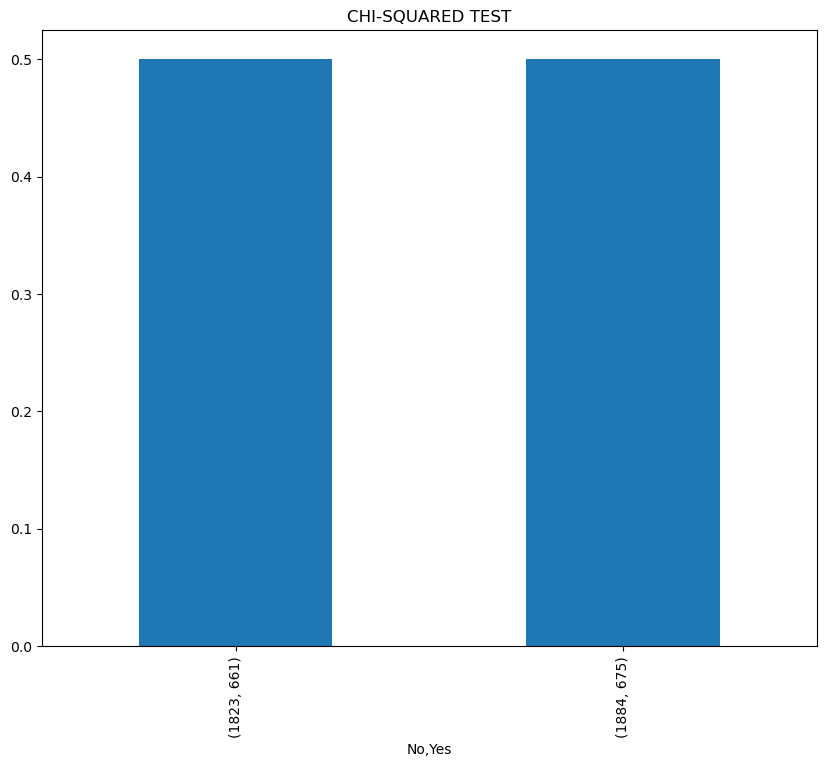

In [305]:
contigency.value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'CHI-SQUARED TEST')

### ANALYTICAL QUESTIONS

#### 1) What is the total charges of all the services

#### 2) What is the total charges of males and females respectively.

#### 3) Which services has the highest churn rate

#### 4) Which Services has the highest charge

#### 5) Which Gender churn the most.

In [337]:
# 1) What is the total charges of all the services

Total_charges_of_services = train_df['TotalCharges']

Total_charges_of_services.sum()

print(f' The Total Annual Charges is: {Total_charges_of_services.sum()}')

 The Total Annual Charges is: 11591044.503777694


In [421]:
# 2) What is the total charges of males and females respectively.

df = train_df[['gender','TotalCharges']]

df.head()

gender  TotalCharges
0     Female     29.850000
329   Female   1470.050049
367   Female     19.150000
1293    Male   7530.799805
1295  Female   5460.200195

In [359]:
# Total charges for females

female_df = df[df['gender'] == 'Female']


In [422]:
female_df.head()

gender  TotalCharges
0  Female     29.850000
4  Female    151.649994
5  Female    820.500000
7  Female    301.899994
8  Female   3046.050049

In [375]:
Females_total_charges = female_df['TotalCharges'].sum()

print(f'The Total Charges for all the Female is : {Females_total_charges}')

The Total Charges for all the Female is : 5721222.055768967


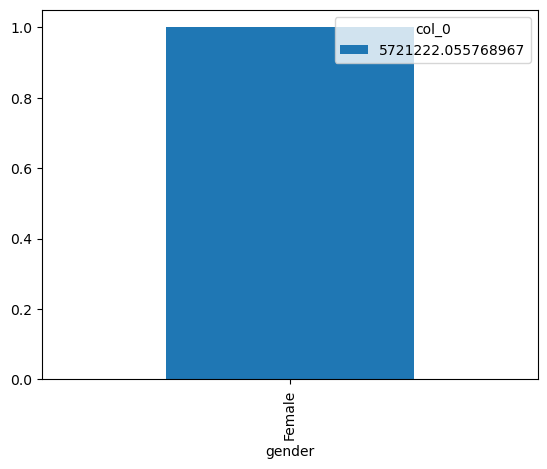

In [468]:
female_charges = pd.crosstab(female_df['gender'],female_df['TotalCharges'].sum())

female_charges.div(female_charges.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

In [367]:
# Total Charges for all the Males

male_df = df[df['gender'] == 'Male']

In [423]:
male_df.head()

gender  TotalCharges
1   Male   1889.500000
2   Male    108.150002
3   Male   1840.750000
6   Male   1949.400024
9   Male   3487.949951

In [378]:
Male_total_charges = male_df['TotalCharges'].sum()

print(f'The Total Charges for all the Male is : {Male_total_charges}')

The Total Charges for all the Male is : 5869822.448008728


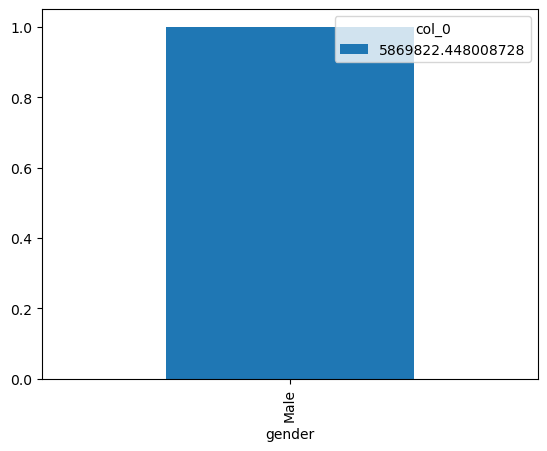

In [470]:
male_charges = pd.crosstab(male_df['gender'],male_df['TotalCharges'].sum())

male_charges.div(male_charges.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

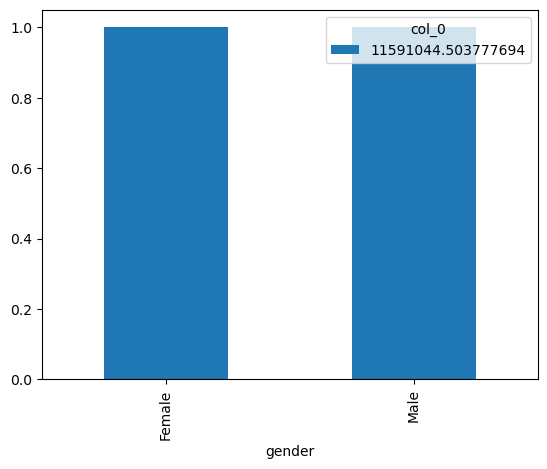

In [472]:
total_charges = pd.crosstab(df['gender'],df['TotalCharges'].sum())

total_charges.div(total_charges.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

In [388]:
# 3) Which services has the highest churn rate

train_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [420]:
train_df = train_df.replace({'No Internet Service':'No'}, inplace = False)

In [415]:
# .value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Churn Rate')

train_df['PhoneService'].value_counts(normalize = True)

Yes    0.903034
No     0.096966
Name: PhoneService, dtype: float64

In [416]:
train_df['PhoneService'].value_counts(normalize = True)

Yes    0.903034
No     0.096966
Name: PhoneService, dtype: float64

In [417]:
#services.value_counts(normalize = True)

train_df['InternetService'].value_counts(normalize = True)

Fiber optic    0.445766
DSL            0.340075
No             0.214158
Name: InternetService, dtype: float64

In [418]:
train_df['OnlineBackup'].value_counts(normalize = True)

No                     0.571485
Yes                    0.343446
No internet service    0.085068
Name: OnlineBackup, dtype: float64

In [409]:
train_df['DeviceProtection'].value_counts(normalize = True)

No                     0.569106
Yes                    0.345826
No internet service    0.085068
Name: DeviceProtection, dtype: float64

In [410]:
train_df['TechSupport'].value_counts(normalize = True)

No                     0.619274
Yes                    0.295657
No internet service    0.085068
Name: TechSupport, dtype: float64

In [411]:
train_df['StreamingTV'].value_counts(normalize = True)

No                     0.529248
Yes                    0.385683
No internet service    0.085068
Name: StreamingTV, dtype: float64

In [412]:
train_df['StreamingMovies'].value_counts(normalize = True)

Yes                    0.522110
No                     0.392822
No internet service    0.085068
Name: StreamingMovies, dtype: float64

fromthe above details;

PhoneService = 90%

InternetService = 0

OnlineBackup = 34%

DeviceProtection = 35%

TechSupport = 30%

StreamingTV = 39%

StreamingMovies = 52%

### Phoneservices has the most churn rate @ 90% followed by StreamingMovies @ 52% and StreamTV @ 39%.

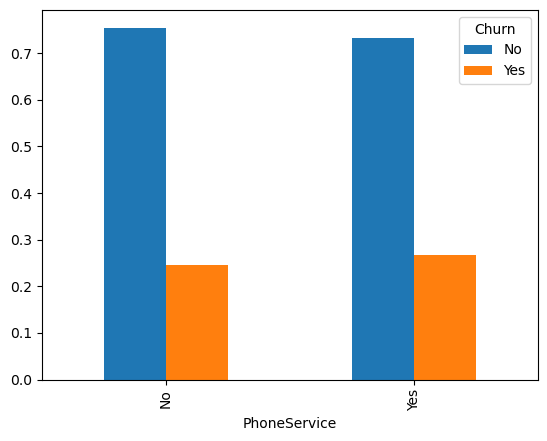

In [464]:
services = pd.crosstab(train_df['PhoneService'],train_df['Churn'])

services.div(services.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

In [424]:
df2 = train_df[['PhoneService','TotalCharges']]

df2.head()

PhoneService  TotalCharges
0              No     29.850000
329           Yes   1470.050049
367           Yes     19.150000
1293          Yes   7530.799805
1295          Yes   5460.200195

In [429]:
train_df[['PhoneService','TotalCharges']].groupby('PhoneService').sum()

TotalCharges
PhoneService              
No            7.304023e+05
Yes           1.086064e+07

In [454]:
# 4) Which Services has the highest charge

train_df.groupby('PhoneService')["TotalCharges"].sum()


PhoneService
No     7.304023e+05
Yes    1.086064e+07
Name: TotalCharges, dtype: float64

In [455]:
train_df.groupby('InternetService')['TotalCharges'].sum()

InternetService
DSL            3.644666e+06
Fiber optic    7.223859e+06
No             7.225198e+05
Name: TotalCharges, dtype: float64

In [456]:
train_df.groupby('OnlineBackup')['TotalCharges'].sum()

OnlineBackup
No                     4.582403e+06
No internet service    2.778745e+05
Yes                    6.730767e+06
Name: TotalCharges, dtype: float64

In [457]:
train_df.groupby('DeviceProtection')['TotalCharges'].sum()

DeviceProtection
No                     4.494183e+06
No internet service    2.778745e+05
Yes                    6.818987e+06
Name: TotalCharges, dtype: float64

In [458]:
train_df.groupby('TechSupport')['TotalCharges'].sum()

TechSupport
No                     5.677652e+06
No internet service    2.778745e+05
Yes                    5.635518e+06
Name: TotalCharges, dtype: float64

In [459]:
train_df.groupby('StreamingTV')['TotalCharges'].sum()

StreamingTV
No                     4.031138e+06
No internet service    2.778745e+05
Yes                    7.282033e+06
Name: TotalCharges, dtype: float64

In [460]:
train_df.groupby('StreamingMovies')['TotalCharges'].sum()

StreamingMovies
No                     3.475793e+06
No internet service    2.778745e+05
Yes                    7.837377e+06
Name: TotalCharges, dtype: float64

In [437]:
# 5) Which Gender churn the most.

train_df[['gender','Churn']].groupby('Churn').value_counts()

Churn  gender
No     Male      1884
       Female    1823
Yes    Male       675
       Female     661
dtype: int64

### The gender that churn the most is Male gender with a total of 675

<AxesSubplot:title={'center':'Churn Rate'}, xlabel='Churn,gender'>

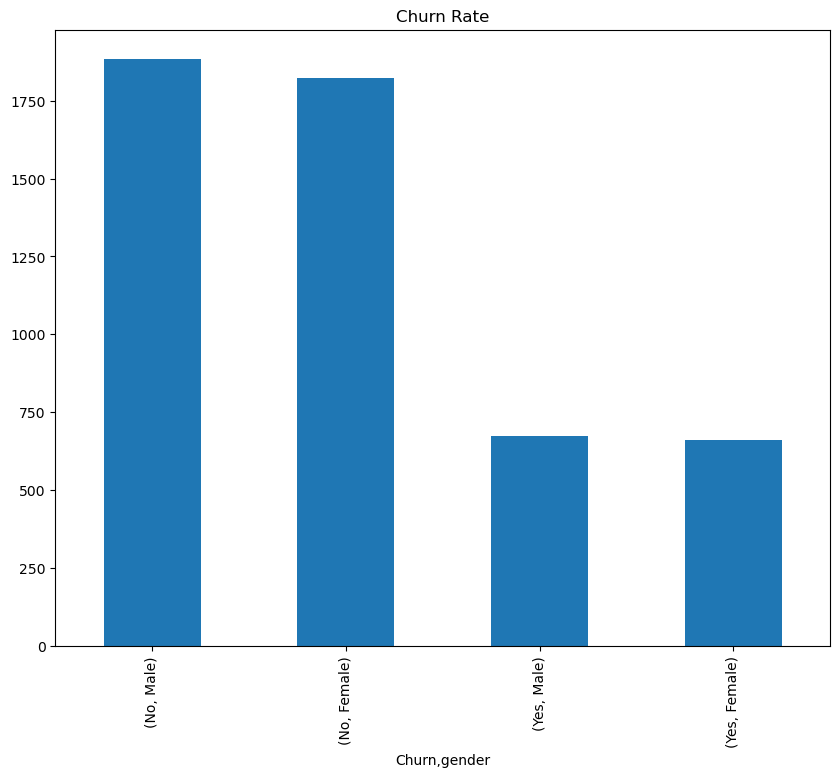

In [463]:
train_df[['gender','Churn']].groupby('Churn').value_counts().plot.bar(figsize = (10,8), title = 'Churn Rate')